In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_excel('./all_days_stats_by_currencies.xlsx')
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.set_index('Fecha', inplace=True)
df.sort_index(inplace=True)
df.head(10)

,Moneda,Id,Oferta
Fecha,,,
2021-01-02 13:00:02,USD,61acb42dab932e127b42177e,50.0
2021-01-07 19:12:15,USD,61acb883bc2bca1ccad3d63d,49.0
2021-01-09 03:15:10,USD,61acb948bc2bca1ccad3d7a5,40.0
2021-01-10 20:44:38,USD,61acba13bc2bca1ccad3d92f,37.5
2021-01-14 20:04:20,USD,61acb241ab932e127b4212c9,42.0
2021-01-20 18:28:01,MLC,61acbe52bc2bca1ccad3e231,42.5
2021-01-21 03:23:10,MLC,61acbec3bc2bca1ccad3e2f3,42.5
2021-01-21 15:50:40,MLC,61acbf09bc2bca1ccad3e3fc,45.0
2021-01-22 18:57:31,MLC,61acbf4abc2bca1ccad3e466,43.0


In [20]:
def get_lower_upper_bond_iql(values):
    q1 = np.quantile(values, 0.25)
    q3 = np.quantile(values, 0.75)

    lower_iqd = q1 - 1.5*(q3-q1)
    upper_iqd = q3 + 1.5*(q3-q1)

    return lower_iqd, upper_iqd


def get_mean_without_outliers_iql(ti):
    if ti.values.shape[0] < 1:
        return np.NaN

    lower_iqd, upper_iqd = get_lower_upper_bond_iql(ti.values)

    new_ti = ti[(ti>=lower_iqd) & (ti<=upper_iqd)]

    return new_ti.mean()

def get_median_without_outliers_iql(ti):
    if ti.values.shape[0] < 1:
        return np.NaN

    lower_iqd, upper_iqd = get_lower_upper_bond_iql(ti.values)

    new_ti = ti[(ti>=lower_iqd) & (ti<=upper_iqd)]

    return new_ti.median()

def get_lower_upper_bond_std(ti):
    std = ti.std()
    m = np.median(ti)
    return m-3*std, m+3*std

def get_median_without_outliers_std(ti):
    if ti.values.shape[0] < 1:
        return np.NaN

    lower_iqd, upper_iqd = get_lower_upper_bond_std(ti.values)

    new_ti = ti[(ti>=lower_iqd) & (ti<=upper_iqd)]

    return new_ti.median()

def get_mean_without_outliers_std(ti):
    if ti.values.shape[0] < 1:
        return np.NaN

    lower_iqd, upper_iqd = get_lower_upper_bond_std(ti.values)

    new_ti = ti[(ti>=lower_iqd) & (ti<=upper_iqd)]

    return new_ti.mean()


daily_mean_iql = df.groupby('Moneda').resample('d').agg({'Oferta':get_mean_without_outliers_iql})
daily_mean_std = df.groupby('Moneda').resample('d').agg({'Oferta':get_mean_without_outliers_std})
daily_median_iql = df.groupby('Moneda').resample('d').agg({'Oferta':get_median_without_outliers_iql})
daily_median_std = df.groupby('Moneda').resample('d').agg({'Oferta':get_median_without_outliers_std})

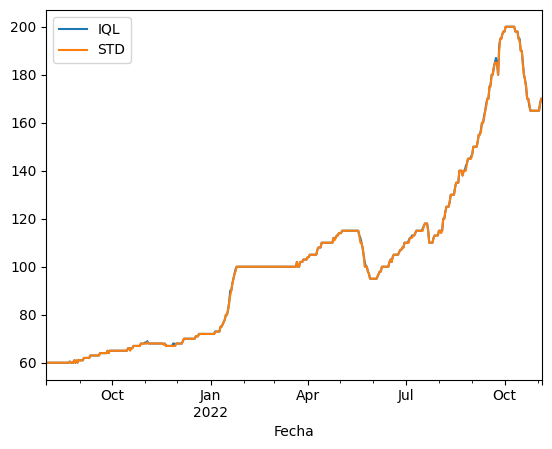

In [18]:
daily_median_iql_usd = daily_median_iql.loc['USD'][daily_median_iql.loc['USD'].index > pd.to_datetime('31/7/2021', dayfirst=True)]
daily_median_std_usd = daily_median_std.loc['USD'][daily_median_std.loc['USD'].index > pd.to_datetime('31/7/2021', dayfirst=True)]


daily_median_iql_usd.Oferta.plot(label='IQL')
daily_median_std_usd.Oferta.plot(label='STD')
plt.legend()

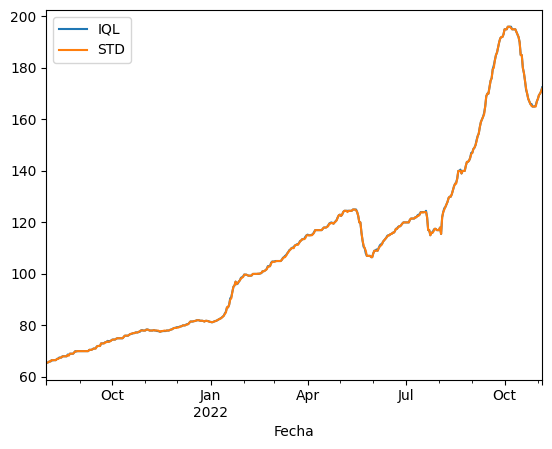

In [16]:
daily_median_iql_usd = daily_median_iql.loc['MLC'][daily_median_iql.loc['MLC'].index > pd.to_datetime('31/7/2021', dayfirst=True)]
daily_median_std_usd = daily_median_std.loc['MLC'][daily_median_std.loc['MLC'].index > pd.to_datetime('31/7/2021', dayfirst=True)]


daily_median_iql_usd.Oferta.plot(label='IQL')
daily_median_std_usd.Oferta.plot(label='STD')
plt.legend()

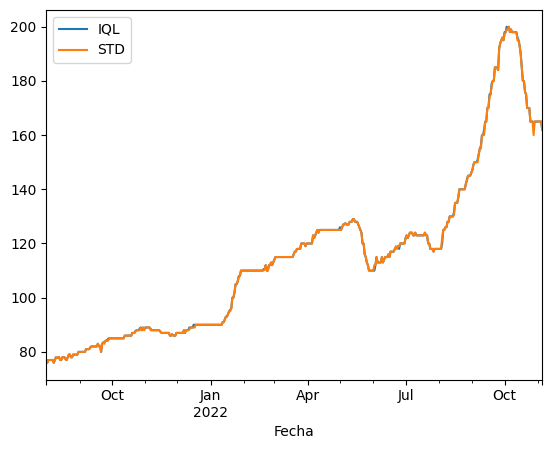

In [19]:
daily_median_iql_usd = daily_median_iql.loc['ECU'][daily_median_iql.loc['ECU'].index > pd.to_datetime('31/7/2021', dayfirst=True)]
daily_median_std_usd = daily_median_std.loc['ECU'][daily_median_std.loc['ECU'].index > pd.to_datetime('31/7/2021', dayfirst=True)]


daily_median_iql_usd.Oferta.plot(label='IQL')
daily_median_std_usd.Oferta.plot(label='STD')
plt.legend()


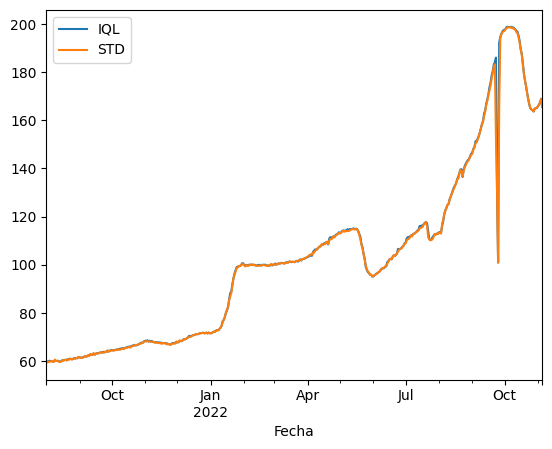

In [21]:
daily_mean_iql_usd = daily_mean_iql.loc['USD'][daily_mean_iql.loc['USD'].index > pd.to_datetime('31/7/2021', dayfirst=True)]
daily_mean_std_usd = daily_mean_std.loc['USD'][daily_mean_std.loc['USD'].index > pd.to_datetime('31/7/2021', dayfirst=True)]


daily_mean_iql_usd.Oferta.plot(label='IQL')
daily_mean_std_usd.Oferta.plot(label='STD')
plt.legend()

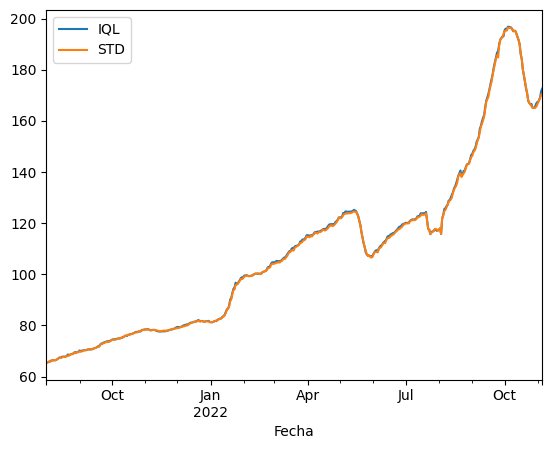

In [22]:
daily_mean_iql_usd = daily_mean_iql.loc['MLC'][daily_mean_iql.loc['MLC'].index > pd.to_datetime('31/7/2021', dayfirst=True)]
daily_mean_std_usd = daily_mean_std.loc['MLC'][daily_mean_std.loc['MLC'].index > pd.to_datetime('31/7/2021', dayfirst=True)]


daily_mean_iql_usd.Oferta.plot(label='IQL')
daily_mean_std_usd.Oferta.plot(label='STD')
plt.legend()

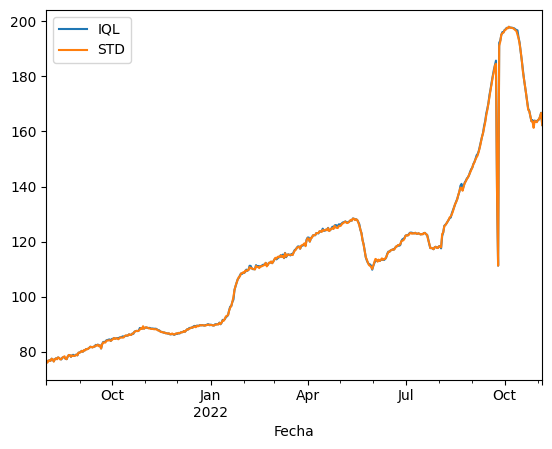

In [23]:
daily_mean_iql_usd = daily_mean_iql.loc['ECU'][daily_mean_iql.loc['ECU'].index > pd.to_datetime('31/7/2021', dayfirst=True)]
daily_mean_std_usd = daily_mean_std.loc['ECU'][daily_mean_std.loc['ECU'].index > pd.to_datetime('31/7/2021', dayfirst=True)]


daily_mean_iql_usd.Oferta.plot(label='IQL')
daily_mean_std_usd.Oferta.plot(label='STD')
plt.legend()